In [1]:
print("hi")

hi


In [2]:
import pandas as pd
import os
def Get_Data(path):
    # Define the directory path
    dir_path = path

    # Create empty dataframe
    df = pd.DataFrame(columns=['filename', 'label'])

    # Iterate over the subdirectories
    for genre in os.listdir(dir_path):
        sub_dir = os.path.join(dir_path, genre)
        if os.path.isdir(sub_dir):
            # Get a list of WAV files within the subdirectory
            wav_files = os.listdir(sub_dir)
            for file in wav_files:
                # Extract file name without extension as label
                name = os.path.splitext(os.path.basename(file))[0]
                # Remove the prefix 'F' or 'H' from the file name
                label = name[1:]
                df = df.append({'filename': os.path.join(sub_dir, file), 'label': os.path.join(genre,label).replace("\\", "")}, ignore_index=True)

    return df


In [3]:
Train_data=Get_Data('C:/Users/lenovo/Desktop/Train')
Test_data=Get_Data('C:/Users/lenovo/Desktop/Test')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\671590745.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'filename': os.path.join(sub_dir, file), 'label': os.path.join(genre,label).replace("\\", "")}, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\671590745.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'filename': os.path.join(sub_dir, file), 'label': os.path.join(genre,label).replace("\\", "")}, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\671590745.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'filename': os.path.join(sub_dir, file), 'label': os.path.join(genre,label).replace("\\", "")}, ignore_index=True

In [4]:
Train_data

,filename,label
0,C:/Users/lenovo/Desktop/Train\F\F 11.wav,F 11
1,C:/Users/lenovo/Desktop/Train\F\F1.wav,F1
2,C:/Users/lenovo/Desktop/Train\F\F2.wav,F2
3,C:/Users/lenovo/Desktop/Train\F\F3 .wav,F3
4,C:/Users/lenovo/Desktop/Train\F\F4.wav,F4
5,C:/Users/lenovo/Desktop/Train\F\F5.wav,F5
6,C:/Users/lenovo/Desktop/Train\F\F6.wav,F6
7,C:/Users/lenovo/Desktop/Train\F\F7.wav,F7
8,C:/Users/lenovo/Desktop/Train\F\F8.wav,F8
9,C:/Users/lenovo/Desktop/Train\F\F9.wav,F9


In [5]:
Test_data

,filename,label
0,C:/Users/lenovo/Desktop/Test\F\F1.wav,F1
1,C:/Users/lenovo/Desktop/Test\F\F11.wav,F11
2,C:/Users/lenovo/Desktop/Test\F\F2.wav,F2
3,C:/Users/lenovo/Desktop/Test\F\F3.wav,F3
4,C:/Users/lenovo/Desktop/Test\F\F4.wav,F4
5,C:/Users/lenovo/Desktop/Test\F\F5.wav,F5
6,C:/Users/lenovo/Desktop/Test\F\F6.wav,F6
7,C:/Users/lenovo/Desktop/Test\F\F7.wav,F7
8,C:/Users/lenovo/Desktop/Test\F\F8.wav,F8
9,C:/Users/lenovo/Desktop/Test\F\F9.wav,F9


In [6]:
!pip install python_speech_features
import numpy as np
import matplotlib.pyplot as plt
import python_speech_features
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank
from scipy.fftpack import dct
import IPython.display as ipd

Defaulting to user installation because normal site-packages is not writeable


In [7]:
!pip install python_speech_features
import numpy as np
from scipy.io import wavfile
from python_speech_features import mfcc


def extract_features(data,dir_path):
  

  # Create empty list to store MFCC features
  mfcc_features = []
  # Iterate over the rows in train_df
  for index, row in data.iterrows():
    # Get the filename and label from the row
    filename = row['filename']
    label = row['label']
    # Create the full path to the audio file
    audio_file_path = os.path.join(dir_path, label, filename)
    
    sampling_rate, signal = wavfile.read(audio_file_path)
    
    # Calculate MFCC features
    mfcc_features_curr = mfcc(signal, sampling_rate)
    
    # Append the MFCC features to the list
    mfcc_features.append(mfcc_features_curr)
  return mfcc_features

Defaulting to user installation because normal site-packages is not writeable


In [8]:
Train_mfcc_features=extract_features(Train_data,'C:/Users/lenovo/Desktop/Train')
Test_mfcc_features=extract_features(Test_data,'C:/Users/lenovo/Desktop/Test')

In [9]:
import numpy as np
from scipy.stats import norm


def eliminate_low_mean_frames(audio_data):
   # Calculate energy for each audio frame
    energy = np.log(np.sum(np.square(audio_data), axis=1))


    # Fit a bi-gaussian model to the energy of each group
    energy_mean, energy_std = norm.fit(energy)


    # Determine frames to keep based on threshold
    threshold = energy_mean - energy_std
    keep_frames = energy >= threshold

    # Remove frames below the threshold
    cleaned_audio_data = audio_data[keep_frames]

    return cleaned_audio_data
Train_cleaned_mfcc_features = []
for feature in Train_mfcc_features:
    cleaned_feature =eliminate_low_mean_frames(feature)
    Train_cleaned_mfcc_features.append(cleaned_feature)

In [10]:
Test_cleaned_mfcc_features = []
for feature in Test_mfcc_features:
    cleaned_feature =eliminate_low_mean_frames(feature)
    Test_cleaned_mfcc_features.append(cleaned_feature)

In [11]:
training=pd.DataFrame({'Features': Train_cleaned_mfcc_features, 'label':Train_data['label']})
testing=pd.DataFrame({'Features': Test_cleaned_mfcc_features, 'label':Test_data['label']})



In [12]:
training

,Features,label
0,"[[16.85616722113648, 18.188831192818682, -50.9...",F 11
1,"[[9.08021378198514, -50.52780891297756, 11.043...",F1
2,"[[8.193510284408857, -37.48834389778205, 3.003...",F2
3,"[[10.500779797985903, -8.45200129716337, -19.2...",F3
4,"[[10.975710199195326, -50.702801389758704, -6....",F4
5,"[[11.713326737842012, -48.02397970826436, -10....",F5
6,"[[14.502990281215629, -5.400949417337153, 2.09...",F6
7,"[[8.45225447008425, -36.77819660354615, 3.1192...",F7
8,"[[3.406290081926572, -42.58115879073473, -19.8...",F8
9,"[[8.448935636278547, -36.83044465846647, 2.603...",F9


In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
def GMM_MODEL(audio,N_Gaussien):
    gmm = GaussianMixture(n_components=N_Gaussien).fit(audio)
    return gmm

In [14]:
import pandas as pd

def create_gmm_models(training_data,N_Gaussien):
    F_models = pd.DataFrame(columns=['label', 'model'])
    H_models = pd.DataFrame(columns=['label', 'model'])

    for i, row in training_data.iterrows():
        # Get the label and features for the current row
        label = row['label']
        features = row['Features']

        # Create the GMM model
        gmm = GMM_MODEL(features, N_Gaussien)

        # Append the label and GMM model to the appropriate dataframe
        if label.startswith('F'):
            F_models = F_models.append({'label': label, 'model': gmm}, ignore_index=True)
        elif label.startswith('H'):
            H_models = H_models.append({'label': label, 'model': gmm}, ignore_index=True)

    return F_models, H_models

In [15]:
F_models_128, H_models_128=create_gmm_models(training,128)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1363001273.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  F_models = F_models.append({'label': label, 'model': gmm}, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1363001273.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  F_models = F_models.append({'label': label, 'model': gmm}, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1363001273.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  F_models = F_models.append({'label': label, 'model': gmm}, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1363001273.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

In [16]:
import numpy as np

import numpy as np
import pandas as pd
 
# Function to get audio segments
def get_audio_segments(audio, num_segments):
    segment_length_frames = int(np.ceil(len(audio) / num_segments))
    
    segments = []
    for i in range(num_segments):
        start = i * segment_length_frames
        end = min(start + segment_length_frames, len(audio))
        segment = audio[start:end]
        segments.append(segment)
    
    return segments

In [17]:
def process_audio_segments(data,num_segments):
    female_file_segments = pd.DataFrame(columns=['segment', 'label'])
    male_file_segments = pd.DataFrame(columns=['segment', 'label'])

    for index, row in data.iterrows():
        audio = row['Features']  # Replace 'audio' with the actual column name or index containing the audio data
        label = row['label']  # Replace 'label' with the actual column name or index containing the label

        segments = get_audio_segments(audio, num_segments)  # Call the get_audio_segments function
        for val in segments:
            if label.startswith('F'):
                female_file_segments = female_file_segments.append({'segment': val, 'label': label}, ignore_index=True)
            elif label.startswith('H'):
                male_file_segments = male_file_segments.append({'segment': val, 'label': label}, ignore_index=True)

    # Save DataFrames to files
    female_file_segments.to_csv('first_file.csv', index=False)
    male_file_segments.to_csv('second_file.csv', index=False)
    return female_file_segments,male_file_segments

In [18]:
female_file_segments_3,male_file_segments_3=process_audio_segments(testing,20)
female_file_segments_10,male_file_segments_10=process_audio_segments(testing,6)
female_file_segments_15,male_file_segments_15=process_audio_segments(testing,4)
female_file_segments_30,male_file_segments_30=process_audio_segments(testing,2)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3357721117.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_segments = female_file_segments.append({'segment': val, 'label': label}, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3357721117.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_segments = female_file_segments.append({'segment': val, 'label': label}, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3357721117.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_segments = female_file_segments.append({'segment': val, 'label': label}, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3357721117.py:12: FutureW

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3357721117.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_segments = female_file_segments.append({'segment': val, 'label': label}, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3357721117.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_segments = female_file_segments.append({'segment': val, 'label': label}, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3357721117.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_segments = female_file_segments.append({'segment': val, 'label': label}, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3357721117.py:12: FutureW

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3357721117.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_segments = female_file_segments.append({'segment': val, 'label': label}, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3357721117.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_segments = female_file_segments.append({'segment': val, 'label': label}, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3357721117.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_segments = female_file_segments.append({'segment': val, 'label': label}, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3357721117.py:12: FutureW

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3357721117.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_segments = male_file_segments.append({'segment': val, 'label': label}, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3357721117.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_segments = male_file_segments.append({'segment': val, 'label': label}, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3357721117.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_segments = male_file_segments.append({'segment': val, 'label': label}, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3357721117.py:14: FutureWarning: The 

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3357721117.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_segments = female_file_segments.append({'segment': val, 'label': label}, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3357721117.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_segments = female_file_segments.append({'segment': val, 'label': label}, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3357721117.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_segments = female_file_segments.append({'segment': val, 'label': label}, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3357721117.py:12: FutureW

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3357721117.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_segments = female_file_segments.append({'segment': val, 'label': label}, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3357721117.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_segments = female_file_segments.append({'segment': val, 'label': label}, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3357721117.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_segments = female_file_segments.append({'segment': val, 'label': label}, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3357721117.py:12: FutureW

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3357721117.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_segments = male_file_segments.append({'segment': val, 'label': label}, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3357721117.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_segments = male_file_segments.append({'segment': val, 'label': label}, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3357721117.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_segments = male_file_segments.append({'segment': val, 'label': label}, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3357721117.py:14: FutureWarning: The 

In [19]:
import pandas as pd

# Assuming you have 'first_file_segments' as a DataFrame with columns 'segment' and 'label'
# Assuming you have 'F_models' as a list of GMM models

# Create an empty DataFrame to store the scores and labels
female_file_scores_df_3_128 = pd.DataFrame(columns=['score', 'True_label'])

for i in range(len(female_file_segments_3)):
    segment = female_file_segments_3.loc[i, 'segment']
    label = female_file_segments_3.loc[i, 'label']
    frames = segment  # Assuming each segment is already divided into frames
    
  
    for index, row in F_models_128.iterrows():

      labelm = row['label']
      model = row['model']

      frame_scores = []
      for frame in frames:
        score = model.score_samples(frame.reshape(1, -1))
        frame_scores.append(score)
        
      segment_score =float(np.mean(frame_scores))
      # Append the mean score and label to the DataFrame
      scores_row = {'score': segment_score, 'True_label': label}
      female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
      female_file_scores_df_3_128['index_model']=labelm
        
    
    


# Save the DataFrame to a file
female_file_scores_df_3_128.to_csv('first_file_scores.csv', index=False)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  female_file_scores_df_3_128 = female_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\3672568982.py:28: FutureWarning: The frame.append

In [20]:

max_score_female_3_128 = female_file_scores_df_3_128['score'].max()
min_score_female_3_128 =female_file_scores_df_3_128['score'].min()

In [21]:
def calculate_counters(df, threshold,Imposteur,Client):
    Imposteur_A= 0
    Client_R= 0

    for index, row in df.iterrows():
        true_label = row['True_label']
        index_model = row['index_model']
        score = row['score']

        if true_label != index_model and score > threshold:
            Imposteur_A+= 1
        elif true_label == index_model and score < threshold:
            Client_R+= 1
    TFA=Imposteur_A/Imposteur
    TFR=Client_R/Client
    return TFR,TFA

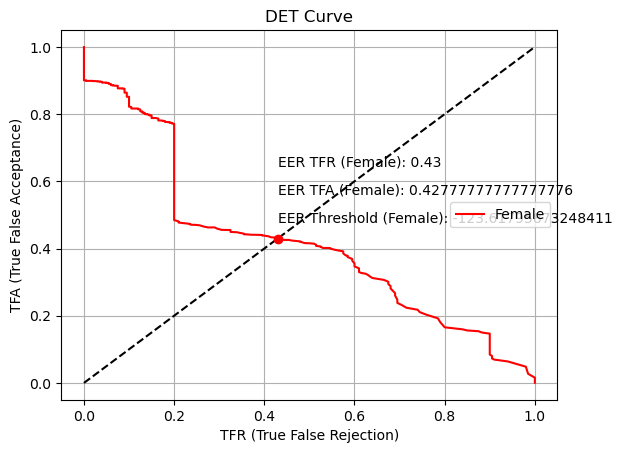

In [22]:
#pour 3 seconds
TFR_values = []
TFA_values = []

score = min_score_female_3_128

while score <= max_score_female_3_128:
    TFR, TFA = calculate_counters(female_file_scores_df_3_128, score, 1800, 200)
    TFR_values.append(TFR)
    TFA_values.append(TFA)
    .
    score += 1



# Calculate EER for female dataframe
EER_idx_female = np.argmin(np.abs(np.subtract(TFA_values, TFR_values)))
EER_threshold_female =min_score_female_3_128 + EER_idx_female
EER_TFA_female = TFA_values[EER_idx_female]
EER_TFR_female = TFR_values[EER_idx_female]


plt.plot(TFR_values, TFA_values,color='red',label='Female')
plt.plot([0, 1], [0, 1], 'k--')  # Plotting the linear line passing through zero

plt.xlabel('TFR (True False Rejection)')
plt.ylabel('TFA (True False Acceptance)')

plt.title('DET Curve')
plt.grid(True)
plt.legend()

# Plot EER points
plt.plot(EER_TFR_female, EER_TFA_female, 'ro', label='EER (Female)')


# Display EER values for Female at the top
plt.annotate(f'EER Threshold (Female): {EER_threshold_female}', (EER_TFR_female, EER_TFA_female), xytext=(0, 10), textcoords='offset points', ha='left', va='bottom')
plt.annotate(f'EER TFA (Female): {EER_TFA_female}', (EER_TFR_female, EER_TFA_female), xytext=(0, 30), textcoords='offset points', ha='left', va='bottom')
plt.annotate(f'EER TFR (Female): {EER_TFR_female}', (EER_TFR_female, EER_TFA_female), xytext=(0, 50), textcoords='offset points', ha='left', va='bottom')


plt.show()


In [24]:
import pandas as pd

# Assuming you have 'first_file_segments' as a DataFrame with columns 'segment' and 'label'
# Assuming you have 'F_models' as a list of GMM models

# Create an empty DataFrame to store the scores and labels
male_file_scores_df_3_128 = pd.DataFrame(columns=['score', 'True_label'])

for i in range(len(male_file_segments_3)):
    segment = male_file_segments_3.loc[i, 'segment']
    label = male_file_segments_3.loc[i, 'label']
    frames = segment  # Assuming each segment is already divided into frames
    
  
    for index, row in H_models_128.iterrows():

      labelm = row['label']
      model = row['model']

      frame_scores = []
      for frame in frames:
        score = model.score_samples(frame.reshape(1, -1))
        frame_scores.append(score)
        
      segment_score =float(np.mean(frame_scores))
      # Append the mean score and label to the DataFrame
      scores_row = {'score': segment_score, 'True_label': label}
      male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
      male_file_scores_df_3_128['index_model']=labelm
        
    
    


# Save the DataFrame to a file
male_file_scores_df_3_128.to_csv('first_file_scores.csv', index=False)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is d

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is d

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is d

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is d

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is d

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is d

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is d

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is d

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is d

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is d

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is d

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is d

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is d

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is d

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is d

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is d

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is d

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is d

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is d

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is d

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is d

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is d

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is d

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is d

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is d

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is d

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is d

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is d

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is d

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is d

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is d

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is d

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is d

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is d

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  male_file_scores_df_3_128 = male_file_scores_df_3_128.append(scores_row, ignore_index=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16164\1909953994.py:28: FutureWarning: The frame.append method is d

In [26]:

max_score_male_3_128 = male_file_scores_df_3_128['score'].max()
min_score_male_3_128 =male_file_scores_df_3_128['score'].min()

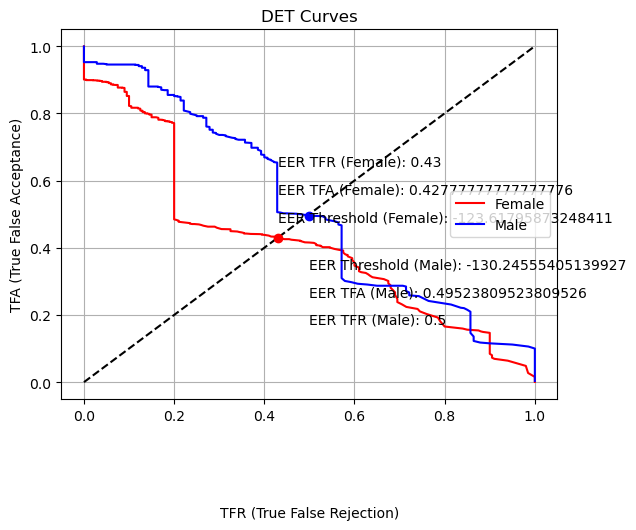

In [30]:
#pour 3 seconds
TFR_values_f = []
TFA_values_f = []

score_female = min_score_female_3_128

while score_female <= max_score_female_3_128:
    TFR_f, TFA_f = calculate_counters(female_file_scores_df_3_128, score_female, 1800, 200)
    TFR_values_f.append(TFR_f)
    TFA_values_f.append(TFA_f)
    score_female += 1

TFR_values_h = []
TFA_values_h = []

score_male = min_score_male_3_128

while score_male <= max_score_male_3_128:
    TFR_h, TFA_h = calculate_counters(male_file_scores_df_3_128, score_male, 840,140)
    TFR_values_h.append(TFR_h)
    TFA_values_h.append(TFA_h)
    score_male += 1


# Calculate EER for female dataframe
EER_idx_female = np.argmin(np.abs(np.subtract(TFA_values_f, TFR_values_f)))
EER_threshold_female =min_score_female_3_128 + EER_idx_female
EER_TFA_female = TFA_values_f[EER_idx_female]
EER_TFR_female = TFR_values_f[EER_idx_female]
# Calculate EER for female dataframe
EER_idx_male = np.argmin(np.abs(np.subtract(TFA_values_h, TFR_values_h)))
EER_threshold_male =min_score_male_3_128 + EER_idx_male
EER_TFA_male = TFA_values_h[EER_idx_male]
EER_TFR_male = TFR_values_h[EER_idx_male]




plt.plot(TFR_values_f, TFA_values_f,color='red',label='Female')
plt.plot(TFR_values_h, TFA_values_h,color='blue', label='Male')
plt.plot([0, 1], [0, 1], 'k--')  # Plotting the linear line passing through zero

plt.xlabel('TFR (True False Rejection)',labelpad=60, va='top')
plt.ylabel('TFA (True False Acceptance)')
plt.title('DET Curves')
plt.grid(True)
plt.legend()

# Plot EER points
plt.plot(EER_TFR_female, EER_TFA_female, 'ro', label='EER (Female)')
plt.plot(EER_TFR_male, EER_TFA_male, 'bo', label='EER (Male)')


# Display EER values for Female at the top
plt.annotate(f'EER Threshold (Female): {EER_threshold_female}', (EER_TFR_female, EER_TFA_female), xytext=(0, 10), textcoords='offset points', ha='left', va='bottom')
plt.annotate(f'EER TFA (Female): {EER_TFA_female}', (EER_TFR_female, EER_TFA_female), xytext=(0, 30), textcoords='offset points', ha='left', va='bottom')
plt.annotate(f'EER TFR (Female): {EER_TFR_female}', (EER_TFR_female, EER_TFA_female), xytext=(0, 50), textcoords='offset points', ha='left', va='bottom')

# Display EER values for Male at the bottom
plt.annotate(f'EER Threshold (Male): {EER_threshold_male}', (EER_TFR_male, EER_TFA_male), xytext=(0, -30), textcoords='offset points', ha='left', va='top')
plt.annotate(f'EER TFA (Male): {EER_TFA_male}', (EER_TFR_male, EER_TFA_male), xytext=(0, -50), textcoords='offset points', ha='left', va='top')
plt.annotate(f'EER TFR (Male): {EER_TFR_male}', (EER_TFR_male, EER_TFA_male), xytext=(0, -70), textcoords='offset points', ha='left', va='top')

plt.show()

#### With 10 seconds

In [ ]:
import pandas as pd

# Assuming you have 'first_file_segments' as a DataFrame with columns 'segment' and 'label'
# Assuming you have 'F_models' as a list of GMM models

# Create an empty DataFrame to store the scores and labels
female_file_scores_df_10_128 = pd.DataFrame(columns=['score', 'True_label'])

for i in range(len(female_file_segments_10)):
    segment = female_file_segments_10.loc[i, 'segment']
    label = female_file_segments_10.loc[i, 'label']
    frames = segment  # Assuming each segment is already divided into frames
    
  
    for index, row in F_models_128.iterrows():

      labelm = row['label']
      model = row['model']

      frame_scores = []
      for frame in frames:
        score = model.score_samples(frame.reshape(1, -1))
        frame_scores.append(score)
        
      segment_score =float(np.mean(frame_scores))
      # Append the mean score and label to the DataFrame
      scores_row = {'score': segment_score, 'True_label': label}
      female_file_scores_df_10_128 = female_file_scores_df_10_128.append(scores_row, ignore_index=True)
      female_file_scores_df_10_128['index_model']=labelm
        
    
    


# Save the DataFrame to a file
female_file_scores_df_10_128.to_csv('first_file_scores.csv', index=False)

In [ ]:
max_score_female_10_128 = female_file_scores_df_10_128['score'].max()
min_score_female_10_128 =female_file_scores_df_10_128['score'].min()

In [ ]:
import pandas as pd

# Assuming you have 'first_file_segments' as a DataFrame with columns 'segment' and 'label'
# Assuming you have 'F_models' as a list of GMM models

# Create an empty DataFrame to store the scores and labels
male_file_scores_df_10_128 = pd.DataFrame(columns=['score', 'True_label'])

for i in range(len(male_file_segments_10)):
    segment = male_file_segments_10.loc[i, 'segment']
    label = male_file_segments_10.loc[i, 'label']
    frames = segment  # Assuming each segment is already divided into frames
    
  
    for index, row in H_models_128.iterrows():

      labelm = row['label']
      model = row['model']

      frame_scores = []
      for frame in frames:
        score = model.score_samples(frame.reshape(1, -1))
        frame_scores.append(score)
        
      segment_score =float(np.mean(frame_scores))
      # Append the mean score and label to the DataFrame
      scores_row = {'score': segment_score, 'True_label': label}
      male_file_scores_df_10_128 = male_file_scores_df_10_128.append(scores_row, ignore_index=True)
      male_file_scores_df_10_128['index_model']=labelm
        
    
    


# Save the DataFrame to a file
male_file_scores_df_10_128.to_csv('first_file_scores.csv', index=False)

In [ ]:


max_score_male_10_128 = male_file_scores_df_10_128['score'].max()
min_score_male_10_128 =male_file_scores_df_10_128['score'].min()



### With 15 seconds

In [ ]:
import pandas as pd

# Assuming you have 'first_file_segments' as a DataFrame with columns 'segment' and 'label'
# Assuming you have 'F_models' as a list of GMM models

# Create an empty DataFrame to store the scores and labels
female_file_scores_df_15_128 = pd.DataFrame(columns=['score', 'True_label'])

for i in range(len(female_file_segments_15)):
    segment = female_file_segments_15.loc[i, 'segment']
    label = female_file_segments_15.loc[i, 'label']
    frames = segment  # Assuming each segment is already divided into frames
    
  
    for index, row in F_models_128.iterrows():

      labelm = row['label']
      model = row['model']

      frame_scores = []
      for frame in frames:
        score = model.score_samples(frame.reshape(1, -1))
        frame_scores.append(score)
        
      segment_score =float(np.mean(frame_scores))
      # Append the mean score and label to the DataFrame
      scores_row = {'score': segment_score, 'True_label': label}
      female_file_scores_df_15_128 = female_file_scores_df_15_128.append(scores_row, ignore_index=True)
      female_file_scores_df_15_128['index_model']=labelm
        
    
    


# Save the DataFrame to a file
female_file_scores_df_15_128.to_csv('first_file_scores.csv', index=False)

In [ ]:
max_score_female_15_128 = female_file_scores_df_15_128['score'].max()
min_score_female_15_128 =female_file_scores_df_15_128['score'].min()

In [ ]:
import pandas as pd

# Assuming you have 'first_file_segments' as a DataFrame with columns 'segment' and 'label'
# Assuming you have 'F_models' as a list of GMM models

# Create an empty DataFrame to store the scores and labels
male_file_scores_df_15_128 = pd.DataFrame(columns=['score', 'True_label'])

for i in range(len(male_file_segments_15)):
    segment = male_file_segments_15.loc[i, 'segment']
    label = male_file_segments_15.loc[i, 'label']
    frames = segment  # Assuming each segment is already divided into frames
    
  
    for index, row in H_models_128.iterrows():

      labelm = row['label']
      model = row['model']

      frame_scores = []
      for frame in frames:
        score = model.score_samples(frame.reshape(1, -1))
        frame_scores.append(score)
        
      segment_score =float(np.mean(frame_scores))
      # Append the mean score and label to the DataFrame
      scores_row = {'score': segment_score, 'True_label': label}
      male_file_scores_df_15_128 = male_file_scores_df_15_128.append(scores_row, ignore_index=True)
      male_file_scores_df_15_128['index_model']=labelm
        
    
    


# Save the DataFrame to a file
male_file_scores_df_15_128.to_csv('first_file_scores.csv', index=False)

In [ ]:

max_score_male_15_128 = male_file_scores_df_15_128['score'].max()
min_score_male_15_128 =male_file_scores_df_15_128['score'].min()



### With 30 seconds

In [ ]:
import pandas as pd

# Assuming you have 'first_file_segments' as a DataFrame with columns 'segment' and 'label'
# Assuming you have 'F_models' as a list of GMM models

# Create an empty DataFrame to store the scores and labels
female_file_scores_df_30_128 = pd.DataFrame(columns=['score', 'True_label'])

for i in range(len(female_file_segments_30)):
    segment = female_file_segments_30.loc[i, 'segment']
    label = female_file_segments_30.loc[i, 'label']
    frames = segment  # Assuming each segment is already divided into frames
    
  
    for index, row in F_models_128.iterrows():

      labelm = row['label']
      model = row['model']

      frame_scores = []
      for frame in frames:
        score = model.score_samples(frame.reshape(1, -1))
        frame_scores.append(score)
        
      segment_score =float(np.mean(frame_scores))
      # Append the mean score and label to the DataFrame
      scores_row = {'score': segment_score, 'True_label': label}
      female_file_scores_df_30_128 = female_file_scores_df_30_128.append(scores_row, ignore_index=True)
      female_file_scores_df_30_128['index_model']=labelm
        
    
    


# Save the DataFrame to a file
female_file_scores_df_30_128.to_csv('first_file_scores.csv', index=False)

In [ ]:
max_score_female_30_128 = female_file_scores_df_30_128['score'].max()
min_score_female_30_128 =female_file_scores_df_30_128['score'].min()

In [ ]:
import pandas as pd

# Assuming you have 'first_file_segments' as a DataFrame with columns 'segment' and 'label'
# Assuming you have 'F_models' as a list of GMM models

# Create an empty DataFrame to store the scores and labels
male_file_scores_df_30_128 = pd.DataFrame(columns=['score', 'True_label'])

for i in range(len(male_file_segments_30)):
    segment = male_file_segments_30.loc[i, 'segment']
    label = male_file_segments_30.loc[i, 'label']
    frames = segment  # Assuming each segment is already divided into frames
    
  
    for index, row in H_models_128.iterrows():

      labelm = row['label']
      model = row['model']

      frame_scores = []
      for frame in frames:
        score = model.score_samples(frame.reshape(1, -1))
        frame_scores.append(score)
        
      segment_score =float(np.mean(frame_scores))
      # Append the mean score and label to the DataFrame
      scores_row = {'score': segment_score, 'True_label': label}
      male_file_scores_df_30_128 = male_file_scores_df_30_128.append(scores_row, ignore_index=True)
      male_file_scores_df_30_128['index_model']=labelm
        
    
    


# Save the DataFrame to a file
male_file_scores_df_30_128.to_csv('first_file_scores.csv', index=False)

In [ ]:
max_score_male_30_128 = male_file_scores_df_30_128['score'].max()
min_score_male_30_128 =male_file_scores_df_30_128['score'].min()

In [ ]:
F_models_256, H_models_256=create_gmm_models(training,256)
F_models_512, H_models_512=create_gmm_models(training,512)
F_models_1024, H_models_1024=create_gmm_models(training,1024)

With 256

With 512

With 1024